In [2]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
import scipy.stats as stats
from scipy.stats import chi2_contingency, ttest_ind, kstest
from scipy.stats import mannwhitneyu

# Configuración
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames


# Gestión de los warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("files/df_nulos_imputados.csv", index_col=0)

In [4]:
df_original = pd.read_csv("files/HR_RAW_DATA.csv", index_col=0)

In [5]:
df_original.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,employeecount,employeenumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NUMCOMPANIESWORKED,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TOTALWORKINGYEARS,TrainingTimesLastYear,WORKLIFEBALANCE,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,SameAsMonthlyIncome,DateBirth,Salary,RoleDepartament,NUMBERCHILDREN,RemoteWork
0,51,No,NaN,"684,0$",NaN,6,3,NaN,1,"162,0",1,0,51,3,5,resEArch DIREcToR,3,NaN,"19537,0",6462,7,Y,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,"19537,0",1972,1000000000$,NaN,NaN,Yes
1,52,No,NaN,"699,0$",NaN,1,4,Life Sciences,1,"259,0",3,0,65,2,5,ManAGeR,3,NaN,"19999,0",5678,0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,"19999,0",1971,1000000000$,NaN,NaN,1
2,42,No,travel_rarely,"532,0$",Research & Development,4,2,Technical Degree,1,"319,0",3,0,58,3,5,ManaGER,4,Married,"19232,0",4933,1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,"19232,0",1981,1000000000$,ManaGER - Research & Development,NaN,1
3,47,No,travel_rarely,"359,0$",NaN,2,4,Medical,1,NaN,1,1,82,3,4,ReseArCH DIrECtOr,3,Married,"17169,0",26703,3,Y,NaN,19,"3,0",2,NaN,2,NaN,2,NaN,20,NaN,5,6,"17169,0",1976,1000000000$,NaN,NaN,False
4,46,No,NaN,"1319,0$",NaN,3,3,Technical Degree,1,NaN,1,1,45,4,4,sAleS EXECUtIve,1,Divorced,NaN,7739,2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,NaN,1977,1000000000$,NaN,NaN,0


# Reporte de resultados

## Contexto general

En este apartado se muestran algunos gráficos que hacen visible la distribución de los empleados en función de factores como la edad, el salario, etc... 

### Edad

''

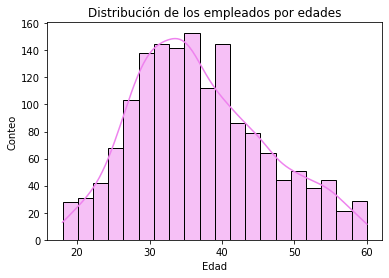

In [6]:
sns.histplot(x = "Age", 
             data = df, 
             color = "violet", 
             kde = True, 
             bins = 20 )

# usando 'plt.xlabel()' cambiamos el nombre del eje x
plt.xlabel("Edad")

# usando el método 'plt.ylabel()' cambiamos el nombre del eje y
plt.ylabel("Conteo")

plt.title('Distribución de los empleados por edades')
;

En este gráfico se observa que existen empleados de todas las edades en la empresa, cpncentrándose, la mayoría de ellos en edades comprendidas entre los 30 y los 40 años.


### Género 

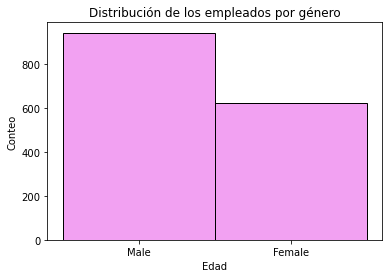

In [7]:
sns.histplot(x = "Gender", 
             data = df, 
             color = "violet", 
             bins = 20 )

# usando 'plt.xlabel()' cambiamos el nombre del eje x
plt.xlabel("Edad")

# usando el método 'plt.ylabel()' cambiamos el nombre del eje y
plt.ylabel("Conteo")

plt.title('Distribución de los empleados por género');

Observamos que hay más hombres que mujeres en la empresa.

### Distribución de salarios

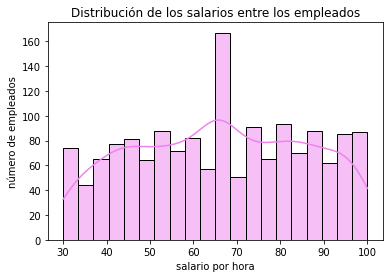

In [8]:
sns.histplot(x = "HourlyRate", 
             data = df, 
             color = "violet", 
             kde = True, 
             bins = 20 )

# usando 'plt.xlabel()' cambiamos el nombre del eje x
plt.xlabel("salario por hora")

# usando el método 'plt.ylabel()' cambiamos el nombre del eje y
plt.ylabel("número de empleados")
plt.title('Distribución de los salarios entre los empleados');

Hay una variedad de salarios amplia (con empleados que cobran 30 €/hora hasta 100 € la hora). Hay un pico alrededor de 68 €/hora. 

## distancia del hogar a la empresa 

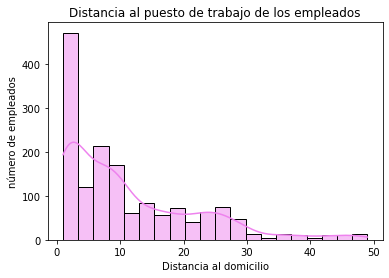

In [9]:
sns.histplot(x = "DistanceFromHome", 
             data = df, 
             color = "violet", 
             kde = True, 
             bins = 20 )

# usando 'plt.xlabel()' cambiamos el nombre del eje x
plt.xlabel("Distancia al domicilio")

# usando el método 'plt.ylabel()' cambiamos el nombre del eje y
plt.ylabel("número de empleados")
plt.title('Distancia al puesto de trabajo de los empleados');

Vemos que la mayoría de los empleados viven relativamente cerca del lugar de trabajo. 

## Resultados del análisis de satisfacción

### EnvironmentSatisfaction

In [10]:
df2 = df.copy()

df2['Test_Env'] = df2['EnvironmentSatisfaction'].apply(lambda x : 'satisfechos' if x >= 3 else 'insatisfechos')

In [11]:
tabla_contingencia2 = pd.crosstab(df2['Test_Env'], df2['Attrition']) 

# Calcular el porcentaje para 'No' en cada fila
tabla_contingencia2['No %'] = tabla_contingencia2['No'] / (tabla_contingencia2['No'] + tabla_contingencia2['Yes']) * 100

# Usar los valores originales de 'Yes' para calcular el porcentaje en cada fila
tabla_contingencia2['Yes %'] = tabla_contingencia2['Yes'] / (tabla_contingencia2['No'] + tabla_contingencia2['Yes']) * 100

tabla_contingencia2

Attrition,No,Yes,No %,Yes %
Test_Env,,,,
insatisfechos,495,126,79.710145,20.289855
satisfechos,816,126,86.624204,13.375796


Establecemos las hipótesis:
- H0 : No existe una relación entre el nivel de satisfacción con el ambiente laboral en el trabajo y la rotación de empleados en la empresa
- H1: Existe una relación entre el nivel de satisfacción con el ambiente laboral en el trabajo y la rotación de empleados en la empresa

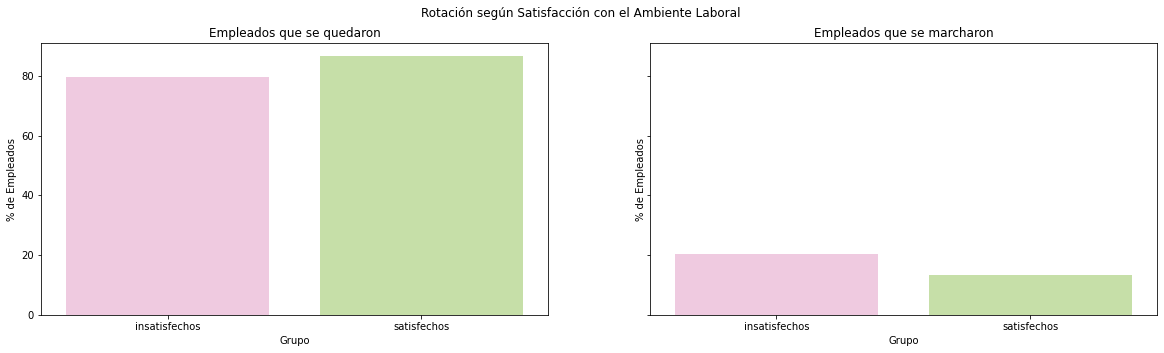

In [12]:
# hacemos un análisis visual previo
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5), sharey=True)

sns.barplot(x=tabla_contingencia2.index, y="No %", data=tabla_contingencia2,  palette = "PiYG", ax = axes[0])
sns.barplot(x=tabla_contingencia2.index, y="Yes %", data=tabla_contingencia2,  palette = "PiYG", ax = axes[1])

fig.suptitle("Rotación según Satisfacción con el Ambiente Laboral")

axes[0].set_title("Empleados que se quedaron")
axes[1].set_title("Empleados que se marcharon")

axes[0].set_xlabel("Grupo")
axes[0].set_ylabel("% de Empleados")

axes[1].set_xlabel("Grupo")
axes[1].set_ylabel("% de Empleados");

In [13]:
# Realizar la prueba de proporciones
chi2, p_value, _, _ = chi2_contingency(tabla_contingencia2)

# Imprimir el resultado de la prueba
alpha = 0.05
if p_value < alpha:
    print(f"Con un p_value de {p_value} hay una diferencia significativa en la cantidad de attrition según el grupo")
else:
    print(f"Con un p_value de {p_value} no hay una diferencia significativa en la cantidad de attrition según el grupo")

Con un p_value de 4.874605803063882e-05 hay una diferencia significativa en la cantidad de attrition según el grupo


- Conclusión: Existe una diferencia significativa en la cantidad de attrition según el grupo de satisfacción, por lo que la hipótesis H0 quedaría descartada. Sí hay una relación entre la satisfacción con el ambiente laboral y la rotación de los empleados.

### JobSatisfaction

In [14]:
df2['Test_Job'] = df2['JobSatisfaction'].apply(lambda x : 'satisfechos' if x >= 3 else 'insatisfechos')

In [15]:
tabla_contingencia3 = pd.crosstab(df2['Test_Job'], df2['Attrition']) 

# Calcular el porcentaje para 'No' en cada fila
tabla_contingencia3['No %'] = tabla_contingencia3['No'] / (tabla_contingencia3['No'] + tabla_contingencia3['Yes']) * 100

# Usar los valores originales de 'Yes' para calcular el porcentaje en cada fila
tabla_contingencia3['Yes %'] = tabla_contingencia3['Yes'] / (tabla_contingencia3['No'] + tabla_contingencia3['Yes']) * 100

tabla_contingencia3

Attrition,No,Yes,No %,Yes %
Test_Job,,,,
insatisfechos,486,121,80.065898,19.934102
satisfechos,825,131,86.297071,13.702929


Establecemos las hipótesis:
- H0 : No existe una relación entre el nivel de satisfacción con el trabajo y la rotación de empleados en la empresa
- H1: Existe una relación entre el nivel de satisfacción con el trabajo y la rotación de empleados en la empresa

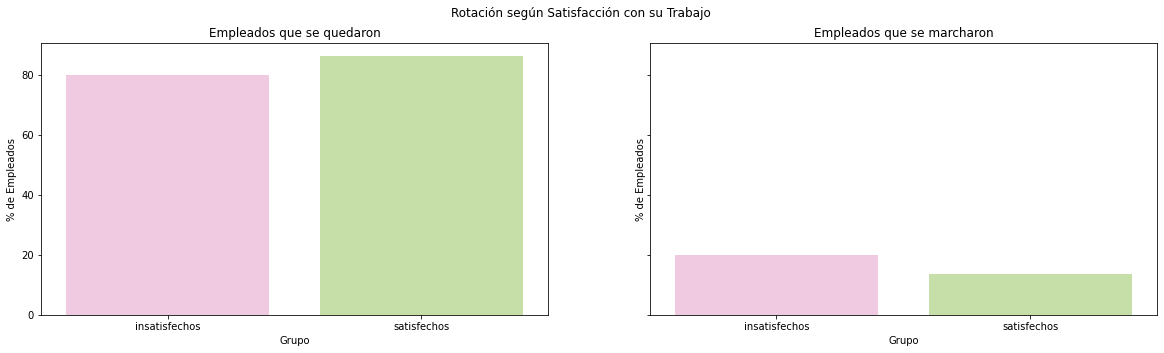

In [16]:
# hacemos un análisis visual previo
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5), sharey=True)

sns.barplot(x=tabla_contingencia3.index, y="No %", data=tabla_contingencia3,  palette = "PiYG", ax = axes[0])
sns.barplot(x=tabla_contingencia3.index, y="Yes %", data=tabla_contingencia3,  palette = "PiYG", ax = axes[1])

fig.suptitle("Rotación según Satisfacción con su Trabajo")

axes[0].set_title("Empleados que se quedaron")
axes[1].set_title("Empleados que se marcharon")

axes[0].set_xlabel("Grupo")
axes[0].set_ylabel("% de Empleados")

axes[1].set_xlabel("Grupo")
axes[1].set_ylabel("% de Empleados");

In [17]:
# Realizar la prueba de proporciones
chi2, p_value, _, _ = chi2_contingency(tabla_contingencia3)

# Imprimir el resultado de la prueba
alpha = 0.05
if p_value < alpha:
    print(f"Con un p_value de {p_value} hay una diferencia significativa en la cantidad de attrition según el grupo")
else:
    print(f"Con un p_value de {p_value} no hay una diferencia significativa en la cantidad de attrition según el grupo")

Con un p_value de 9.629446727636445e-05 hay una diferencia significativa en la cantidad de attrition según el grupo


- Conclusión: Existe una diferencia significativa en la cantidad de attrition según el grupo de satisfacción, por lo que la hipótesis H0 quedaría descartada. Sí hay una relación entre la satisfacción con el trabajo y la rotación de los empleados.

### EnvironmentSatisfaction

In [18]:
df2['Test_Rel'] = df2['RelationshipSatisfaction'].apply(lambda x : 'satisfechos' if x >= 3 else 'insatisfechos')

In [19]:
tabla_contingencia4 = pd.crosstab(df2['Test_Rel'], df2['Attrition']) 

# Calcular el porcentaje para 'No' en cada fila
tabla_contingencia4['No %'] = tabla_contingencia4['No'] / (tabla_contingencia4['No'] + tabla_contingencia4['Yes']) * 100

# Usar los valores originales de 'Yes' para calcular el porcentaje en cada fila
tabla_contingencia4['Yes %'] = tabla_contingencia4['Yes'] / (tabla_contingencia4['No'] + tabla_contingencia4['Yes']) * 100

tabla_contingencia4

Attrition,No,Yes,No %,Yes %
Test_Rel,,,,
insatisfechos,511,106,82.820097,17.179903
satisfechos,800,146,84.566596,15.433404


Establecemos las hipótesis:
- H0 : No existe una relación entre el nivel de satisfacción con las relaciones en el trabajo y la rotación de empleados en la empresa
- H1: Existe una relación entre el nivel de satisfacción con las relaciones en el trabajo y la rotación de empleados en la empresa

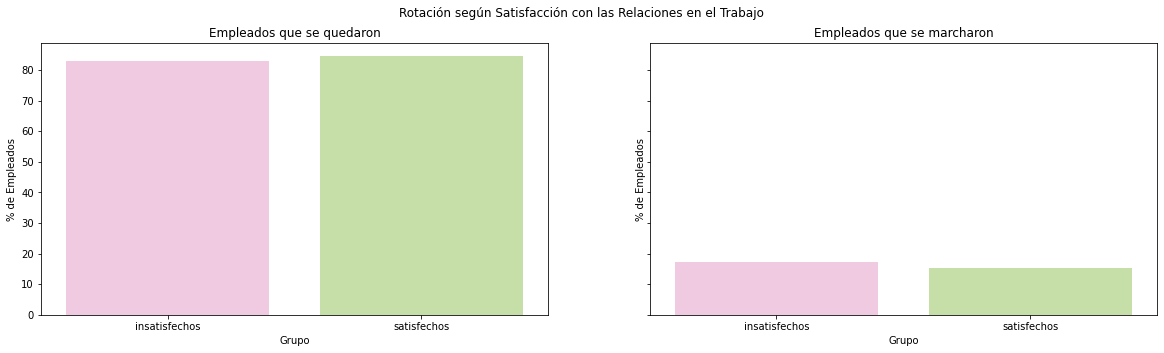

In [20]:
# hacemos un análisis visual previo
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5), sharey=True)

sns.barplot(x=tabla_contingencia4.index, y="No %", data=tabla_contingencia4,  palette = "PiYG", ax = axes[0])
sns.barplot(x=tabla_contingencia4.index, y="Yes %", data=tabla_contingencia4,  palette = "PiYG", ax = axes[1])

fig.suptitle("Rotación según Satisfacción con las Relaciones en el Trabajo")

axes[0].set_title("Empleados que se quedaron")
axes[1].set_title("Empleados que se marcharon")

axes[0].set_xlabel("Grupo")
axes[0].set_ylabel("% de Empleados")

axes[1].set_xlabel("Grupo")
axes[1].set_ylabel("% de Empleados");

In [21]:
# Realizar la prueba de proporciones
chi2, p_value, _, _ = chi2_contingency(tabla_contingencia4)

# Imprimir el resultado de la prueba
alpha = 0.05
if p_value < alpha:
    print(f"Con un p_value de {p_value} hay una diferencia significativa en la cantidad de attrition según el grupo")
else:
    print(f"Con un p_value de {p_value} no hay una diferencia significativa en la cantidad de attrition según el grupo")

Con un p_value de 0.028125138572455417 hay una diferencia significativa en la cantidad de attrition según el grupo


- Conclusión: No existe una diferencia significativa en la cantidad de attrition según el grupo de satisfacción, por lo que la hipótesis H0 no se podría descartar. No existe una relación entre el nivel de satisfacción con las relaciones en el trabajo y la rotación de los empleados.

## Otros factores de influencia

### TotalWorkingYears

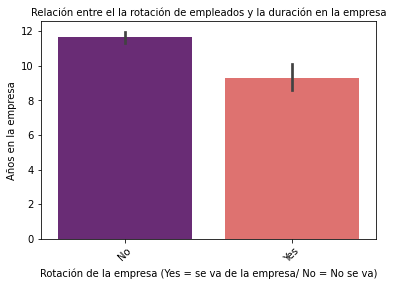

In [22]:
#realizamos un gráfico para visualizar como se distribuyen los salarios en función del nivel educativo

sns.barplot(x = "Attrition", 
               y = "TotalWorkingYears", 
               data = df,
               palette = "magma")


plt.xlabel("Rotación de la empresa (Yes = se va de la empresa/ No = No se va)")
plt.ylabel("Años en la empresa")
plt.xticks(rotation = 45)
plt.title("Relación entre el la rotación de empleados y la duración en la empresa", fontsize = 10);

En el gráfico observamos que parece existir una relación entre los años que un empleado lleva en la empresa y la rotación (a mayor número de años en la empresa, menor rotación)
Vamos a comprobar si existe una diferencia significativa

In [23]:
#Vamos a estudiar la normalidad de esta variable, para ver si podemos aplicar el test de student. 

# lo primero que hacemos es crear una función para testar la normalidad de los datos
def normalidad(dataframe, columna):
    """
    Evalúa la normalidad de una columna de datos de un DataFrame utilizando la prueba de Shapiro-Wilk.

    Parámetros:
        dataframe (DataFrame): El DataFrame que contiene los datos.
        columna (str): El nombre de la columna en el DataFrame que se va a evaluar para la normalidad.

    Returns:
        None: Imprime un mensaje indicando si los datos siguen o no una distribución normal.
    """

    statistic, p_value = stats.shapiro(dataframe[columna])
    if p_value > 0.05:
        print(f"Para la columna {columna} los datos siguen una distribución normal.")
    else:
        print(f"Para la columna {columna} los datos no siguen una distribución normal.")

In [24]:
normalidad(df ,'TotalWorkingYears')

Para la columna TotalWorkingYears los datos no siguen una distribución normal.


In [25]:
# Como los datos no siguen una distribución normal, tenemos que hacer una prueba no paramétrica, en este caso Mann Whitney

In [26]:
grupo_si = df[df['Attrition'] == 'Yes']['TotalWorkingYears']
grupo_no = df[df['Attrition'] == 'No']['TotalWorkingYears']

In [27]:
# Realizar el test de Mann-Whitney U

stat, p_value = mannwhitneyu(grupo_si, grupo_no)

# Imprimir los resultados
print("Estadística de prueba U:", stat)
print("Valor p:", p_value)

# Interpretar los resultados
if p_value < 0.05:
    print("Hay evidencia estadística para rechazar la hipótesis nula. Hay diferencias significativas entre los grupos.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. No hay diferencias significativas entre los grupos.")

Estadística de prueba U: 131490.0
Valor p: 2.7706623639012144e-07
Hay evidencia estadística para rechazar la hipótesis nula. Hay diferencias significativas entre los grupos.


### Age

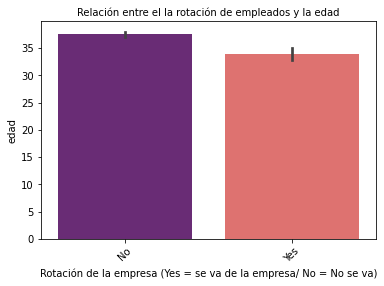

In [28]:
sns.barplot(x = "Attrition", 
               y = "Age", 
               data = df,
               palette = "magma")


plt.xlabel("Rotación de la empresa (Yes = se va de la empresa/ No = No se va)")
plt.ylabel("edad")
plt.xticks(rotation = 45)
plt.title("Relación entre el la rotación de empleados y la edad", fontsize = 10);

In [29]:
#Vamos a estudiar la normalidad de esta variable, para ver si podemos aplicar el test de student. 

# lo primero que hacemos es crear una función para testar la normalidad de los datos
def normalidad(dataframe, columna):
    """
    Evalúa la normalidad de una columna de datos de un DataFrame utilizando la prueba de Shapiro-Wilk.

    Parámetros:
        dataframe (DataFrame): El DataFrame que contiene los datos.
        columna (str): El nombre de la columna en el DataFrame que se va a evaluar para la normalidad.

    Returns:
        None: Imprime un mensaje indicando si los datos siguen o no una distribución normal.
    """

    statistic, p_value = stats.shapiro(dataframe[columna])
    if p_value > 0.05:
        print(f"Para la columna {columna} los datos siguen una distribución normal.")
    else:
        print(f"Para la columna {columna} los datos no siguen una distribución normal.")

In [30]:
normalidad(df ,'Age')

Para la columna Age los datos no siguen una distribución normal.


In [31]:
grupo_si_age = df[df['Attrition'] == 'Yes']['Age']
grupo_no_age = df[df['Attrition'] == 'No']['Age']

In [32]:
# Realizar el test de Mann-Whitney U

stat, p_value = mannwhitneyu(grupo_si_age, grupo_no_age)

# Imprimir los resultados
print("Estadística de prueba U:", stat)
print("Valor p:", p_value)

# Interpretar los resultados
if p_value < 0.05:
    print("Hay evidencia estadística para rechazar la hipótesis nula. Hay diferencias significativas entre los grupos.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. No hay diferencias significativas entre los grupos.")

Estadística de prueba U: 123999.0
Valor p: 3.3749920113704813e-10
Hay evidencia estadística para rechazar la hipótesis nula. Hay diferencias significativas entre los grupos.


### YearsWithCurrentManager

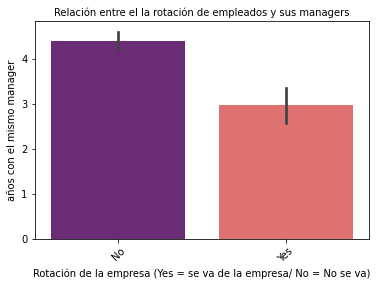

In [33]:
sns.barplot(x = "Attrition", 
               y = "YearsWithCurrManager", 
               data = df,
               palette = "magma")


plt.xlabel("Rotación de la empresa (Yes = se va de la empresa/ No = No se va)")
plt.ylabel("años con el mismo manager")
plt.xticks(rotation = 45)
plt.title("Relación entre el la rotación de empleados y sus managers", fontsize = 10);

In [34]:
#Vamos a estudiar la normalidad de esta variable, para ver si podemos aplicar el test de student. 

# lo primero que hacemos es crear una función para testar la normalidad de los datos
def normalidad(dataframe, columna):
    """
    Evalúa la normalidad de una columna de datos de un DataFrame utilizando la prueba de Shapiro-Wilk.

    Parámetros:
        dataframe (DataFrame): El DataFrame que contiene los datos.
        columna (str): El nombre de la columna en el DataFrame que se va a evaluar para la normalidad.

    Returns:
        None: Imprime un mensaje indicando si los datos siguen o no una distribución normal.
    """

    statistic, p_value = stats.shapiro(dataframe[columna])
    if p_value > 0.05:
        print(f"Para la columna {columna} los datos siguen una distribución normal.")
    else:
        print(f"Para la columna {columna} los datos no siguen una distribución normal.")

In [35]:
normalidad(df ,'YearsWithCurrManager')

Para la columna YearsWithCurrManager los datos no siguen una distribución normal.


In [36]:
grupo_si_manager = df[df['Attrition'] == 'Yes']['YearsWithCurrManager']
grupo_no_manager = df[df['Attrition'] == 'No']['YearsWithCurrManager']

In [37]:
# Realizar el test de Mann-Whitney U

stat, p_value = mannwhitneyu(grupo_si_manager, grupo_no_manager)

# Imprimir los resultados
print("Estadística de prueba U:", stat)
print("Valor p:", p_value)

# Interpretar los resultados
if p_value < 0.05:
    print("Hay evidencia estadística para rechazar la hipótesis nula. Hay diferencias significativas entre los grupos.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. No hay diferencias significativas entre los grupos.")

Estadística de prueba U: 123616.5
Valor p: 1.4402354109822127e-10
Hay evidencia estadística para rechazar la hipótesis nula. Hay diferencias significativas entre los grupos.


Aunque hay diferencias significativas, creemos que tiene que ver con que las personas que llevan más años en la empresa, llevan más años con el mismo manager. No nos da mucha información sobre si la veriable influye o no en la rotación de empleados

### Relación entre el salario y el puesto entre los dos géneros

- Lo primero que nos llama la atención es que no existe una jerarquía clara entre salarios de distintas responsabilidades. Por ejemplo, cabe esperar que de acuerdo con la jerarquía de puestos dentro de la empresa, el salario vaya acorde con éste. 
- Lo siguiente es la diferencia en el promedio de salarios entre hombres y mujeres en los diferentes puestos. 

In [38]:
def barplot (x_value, y_value, data_value, palette_value , hue_value, legend_title, show_legend, x_label, y_label, title_value, size = (10 , 6)):
    """
    Crea un gráfico de barras utilizando Seaborn.
    Parámetros:
    - x_value: Nombre de la columna en el DataFrame que se utilizará en el eje x.
    - y_value: Nombre de la columna en el DataFrame que se utilizará en el eje y.
    - data_value: DataFrame que contiene los datos a graficar.
    - palette_value: Paleta de colores a utilizar en las barras.
    - hue_value: Nombre de la columna en el DataFrame para agrupar y colorear las barras.
    - legend_title: Título de la leyenda del gráfico.
    - x_label: Etiqueta del eje x.
    - y_label: Etiqueta del eje y.
    - title_value: Título del gráfico.
    - size: Tamaño de la figura del gráfico (opcional, por defecto es (10, 6)).
    Retorna:
    No retorna ningún valor. Muestra el gráfico de barras.
    Esta función utiliza Seaborn para crear un gráfico de barras a partir de los datos proporcionados.
    Permite especificar el eje x, el eje y, la paleta de colores, la agrupación por categoría y la inclusión de una leyenda.
    Ejemplo de uso:
    barplot(x_value='Year',
            y_value='Revenue',
            data_value=yearly_data,
            palette_value='Blues',
            hue_value='Category',
            legend_title='Product Category',
            x_label='Año',
            y_label='Ingresos',
            title_value='Ingresos Anuales por Categoría de Producto',
            size=(12, 8))
    """
    plt.figure(figsize= size)
    sns.barplot(data = data_value,
                x = x_value,
                y = y_value,
                hue = hue_value,
                palette = palette_value)
    if show_legend and hue_value:
        plt.legend(title=legend_title)
    plt.title(title_value)
    plt.xlabel(x_label)
    plt.ylabel(y_label);

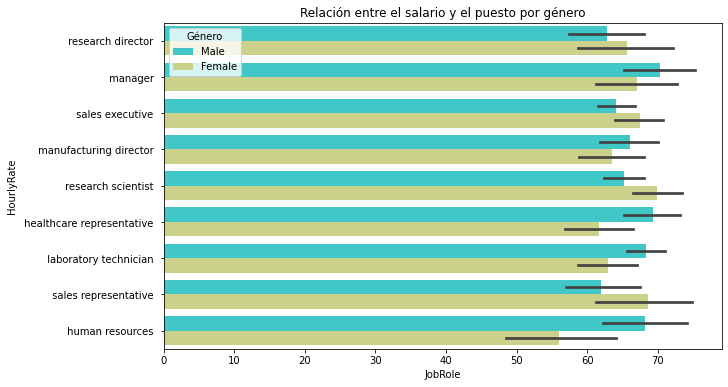

In [39]:
barplot('HourlyRate','JobRole', df, 'rainbow', 'Gender', 'Género', True, 'JobRole','HourlyRate','Relación entre el salario y el puesto por género') 

## Recomendaciones para la empresa 

### 1. Datos incompletos.

Tras en análisis de los datos, lo primero que encontramos es una elevada cantidad de datos incompletos. Una recopilación cuidadosa de los datos aporta mucha precision a la hora de realizar cualquier análisis posterior. Una de nuestras recomendaciones a la empresa sería la de ser más precisos en esta tarea. 

In [40]:
# lo convertimos a DataFrame
df_nulos = pd.DataFrame(df_original.isna().sum()/df_original.shape[0]*100, columns = ["%_nulos"])

# filtramos el DataFrame para quedarnos solo con aquellas columnas que tengan nulos
df_nulos[df_nulos["%_nulos"] > 0]
#podemos ver que hay dos columnas que tienen un elevado porcentaje de nulos (casi un 90%). Más adelante veremos cómo lo gestionaremos.

,%_nulos
BusinessTravel,47.831475
Department,81.288724
EducationField,46.158612
employeenumber,26.703841
MaritalStatus,40.334572
MonthlyIncome,52.230483
Over18,55.824040
OverTime,41.883519
PerformanceRating,12.081784
StandardHours,74.039653


Algunas de las columnas, como NumberChildren, no contienen datos. Tener datos en esta columna aportaría información valiosa a la empresa para la gestión de temas que influyen en la satisfacción de los empleados, como es la conciliación familiar. 

### 2. Recopilación no uniforme de los datos.

Algunos de los datos que la empresa ha recopilado, no tienen mucho sentido. Por ejemplo, a la hora de hacer las encuestas, se les ha pedido a los empleados que respondan acerca de su grado de satisfacción con diferentes aspectos del trabajo en una escala del 1 al 4. Algunas de las respuestas obtenidas estań en números del 1 al 50. Ante esta situación, hemos tenido que tomar decisiones sobre qué hacer con éstos:¿tomarlos como una escala del 1 al 50?¿tomarlos como si fueran, enrrealidad, números decimales?

In [41]:
df_original['EnvironmentSatisfaction'].unique()
# los valores están descritos del 1 al 50, no del 1 al 4. Probablemente sea porque lo han querido hacer como decimal pero no le han puesto el . 
# no podemos sacar conclusiones con los datos de esta manera

array([ 1,  3,  4,  2, 42, 37, 35, 25, 27, 31, 39, 21, 15, 14, 33, 19, 12,
       13, 28, 47, 36, 29, 24, 46, 16, 22, 41, 49, 11, 48, 18, 10, 45, 38,
       17, 20, 26, 43])